In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

plt.style.use('dark_background')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = sns.color_palette('deep'))
plt.rcParams['figure.figsize'] = (20 , 10)


In [3]:
words = open('names.txt' , 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

# bigrams


In [4]:
# create a dictionary of bigrams
bigrams = {}
for word in words:
    chars = ["<S>"] + list(word) + ["<E>"]
    for c1 , c2 in zip(chars , chars[1:]):
        bigram = (c1 , c2)
        bigrams[bigram] = bigrams.get(bigram , 0) + 1

sorted(bigrams.items() , key = lambda x: x[1] , reverse = True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

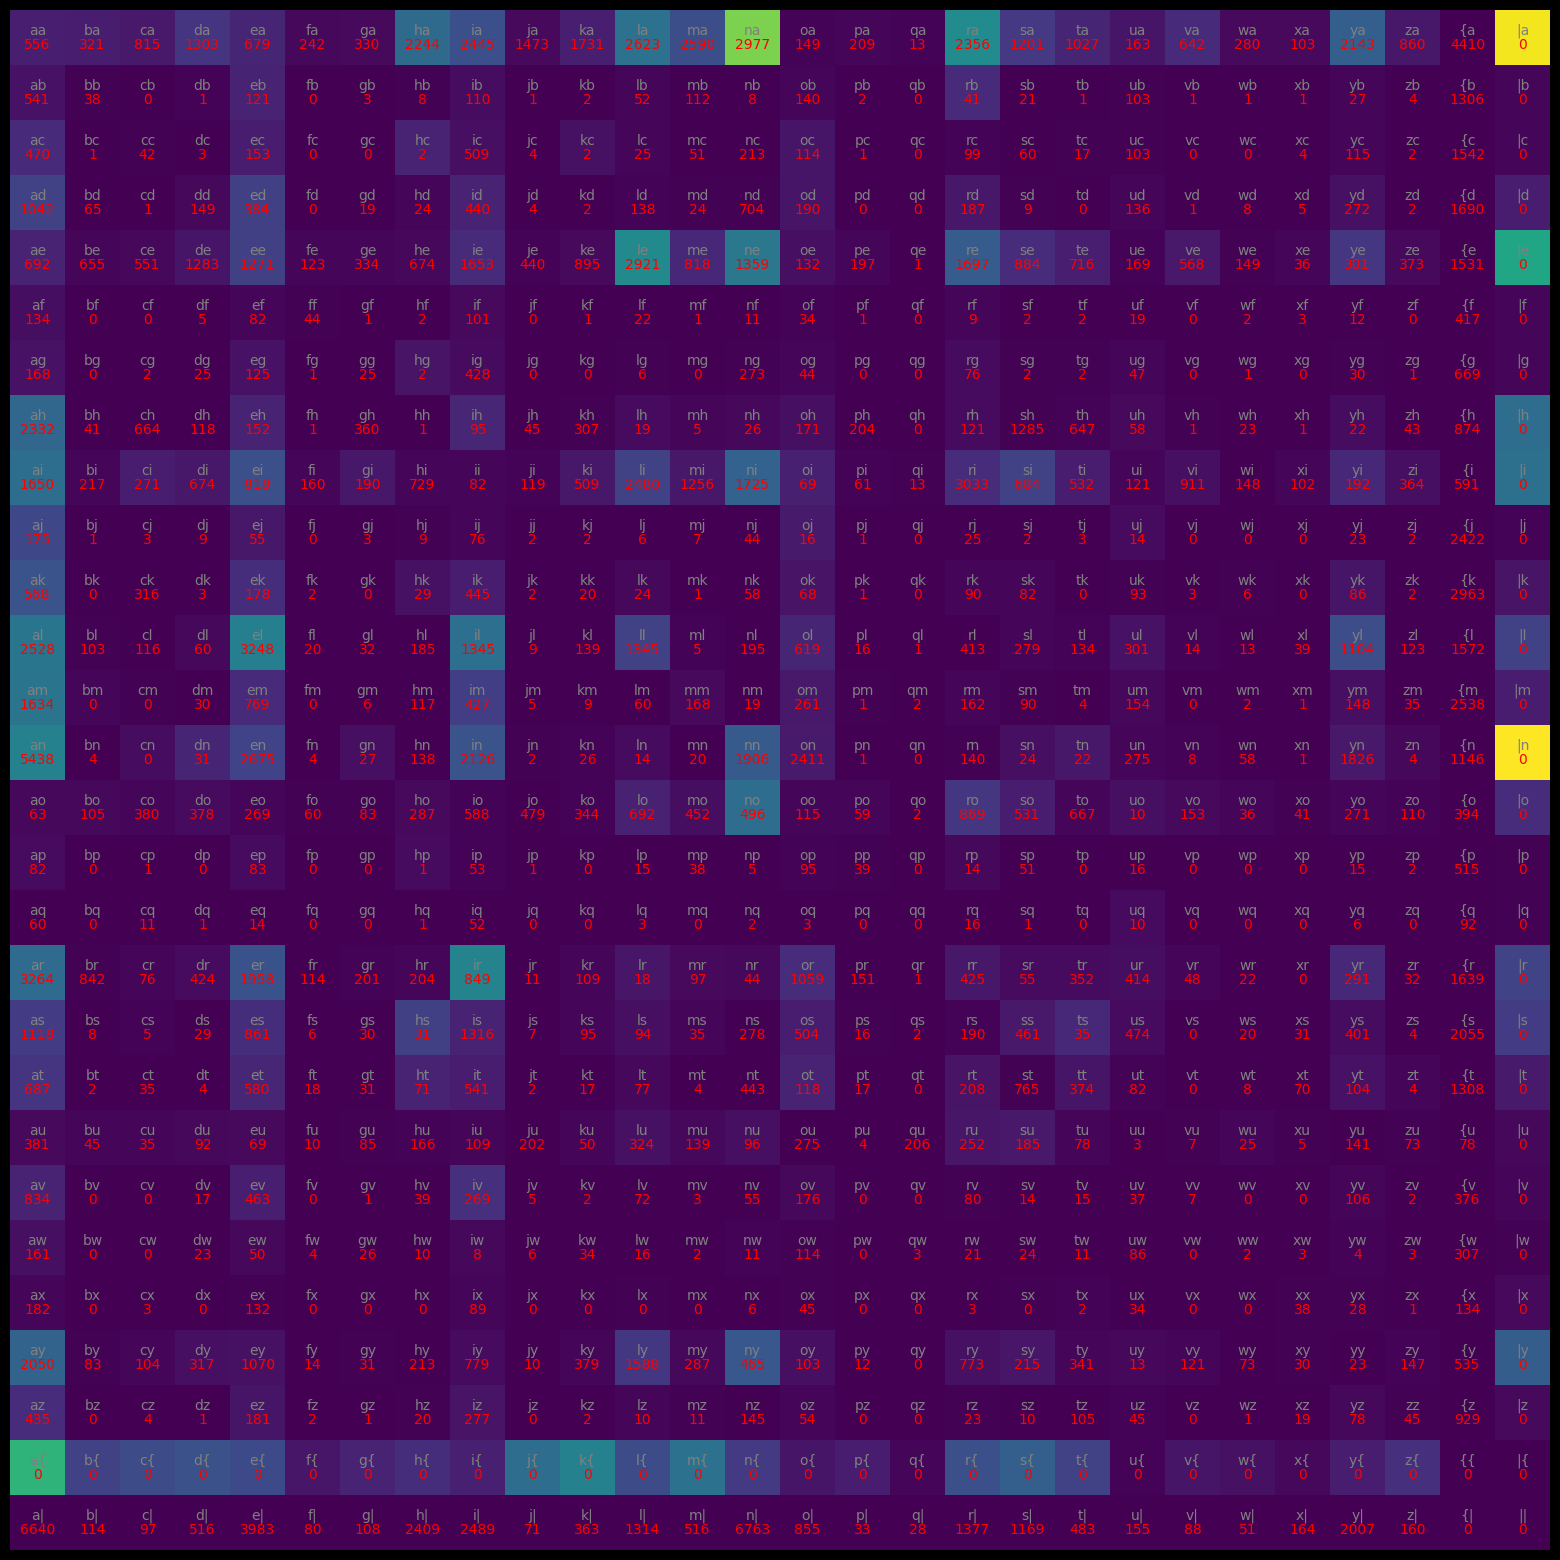

In [5]:
# # create a tensor to represent bigrams:
# # row index -> first character , col index -> second character

# create mapping from character to integer
cti = {chr(i) : i - 97 for i in range(97 , 97 + 26)}
cti['<S>'] = 26
cti['<E>'] = 27
# print(f"{cti}")

n = len(cti.keys())
bigrams = torch.zeros((n , n) , dtype = torch.int32)
for word in words:
    chars = ['<S>'] + list(word) + ['<E>']
    for c1 , c2 in zip(chars , chars[1:]):
        bigrams[cti[c1] , cti[c2]]+=1

plt.figure(figsize=(20 , 20))
plt.imshow(bigrams)
for i in range(28):
    for j in range(28):
        text = chr(i + 97) + chr(j + 97)
        plt.text(i , j , text , ha = 'center' , va = 'bottom' , color = 'grey')
        plt.text(i , j , bigrams[i , j].item() , ha = 'center' , va = 'top' , color = 'red')

plt.axis('off')
plt.show()

## replace helucination characters \<s\> and \<e\> with a single "." character.


In [6]:
stoi = {chr(i + 97) : i + 1 for i in range(26) }
stoi['.'] = 0
itos = {j : i for i , j in stoi.items()}

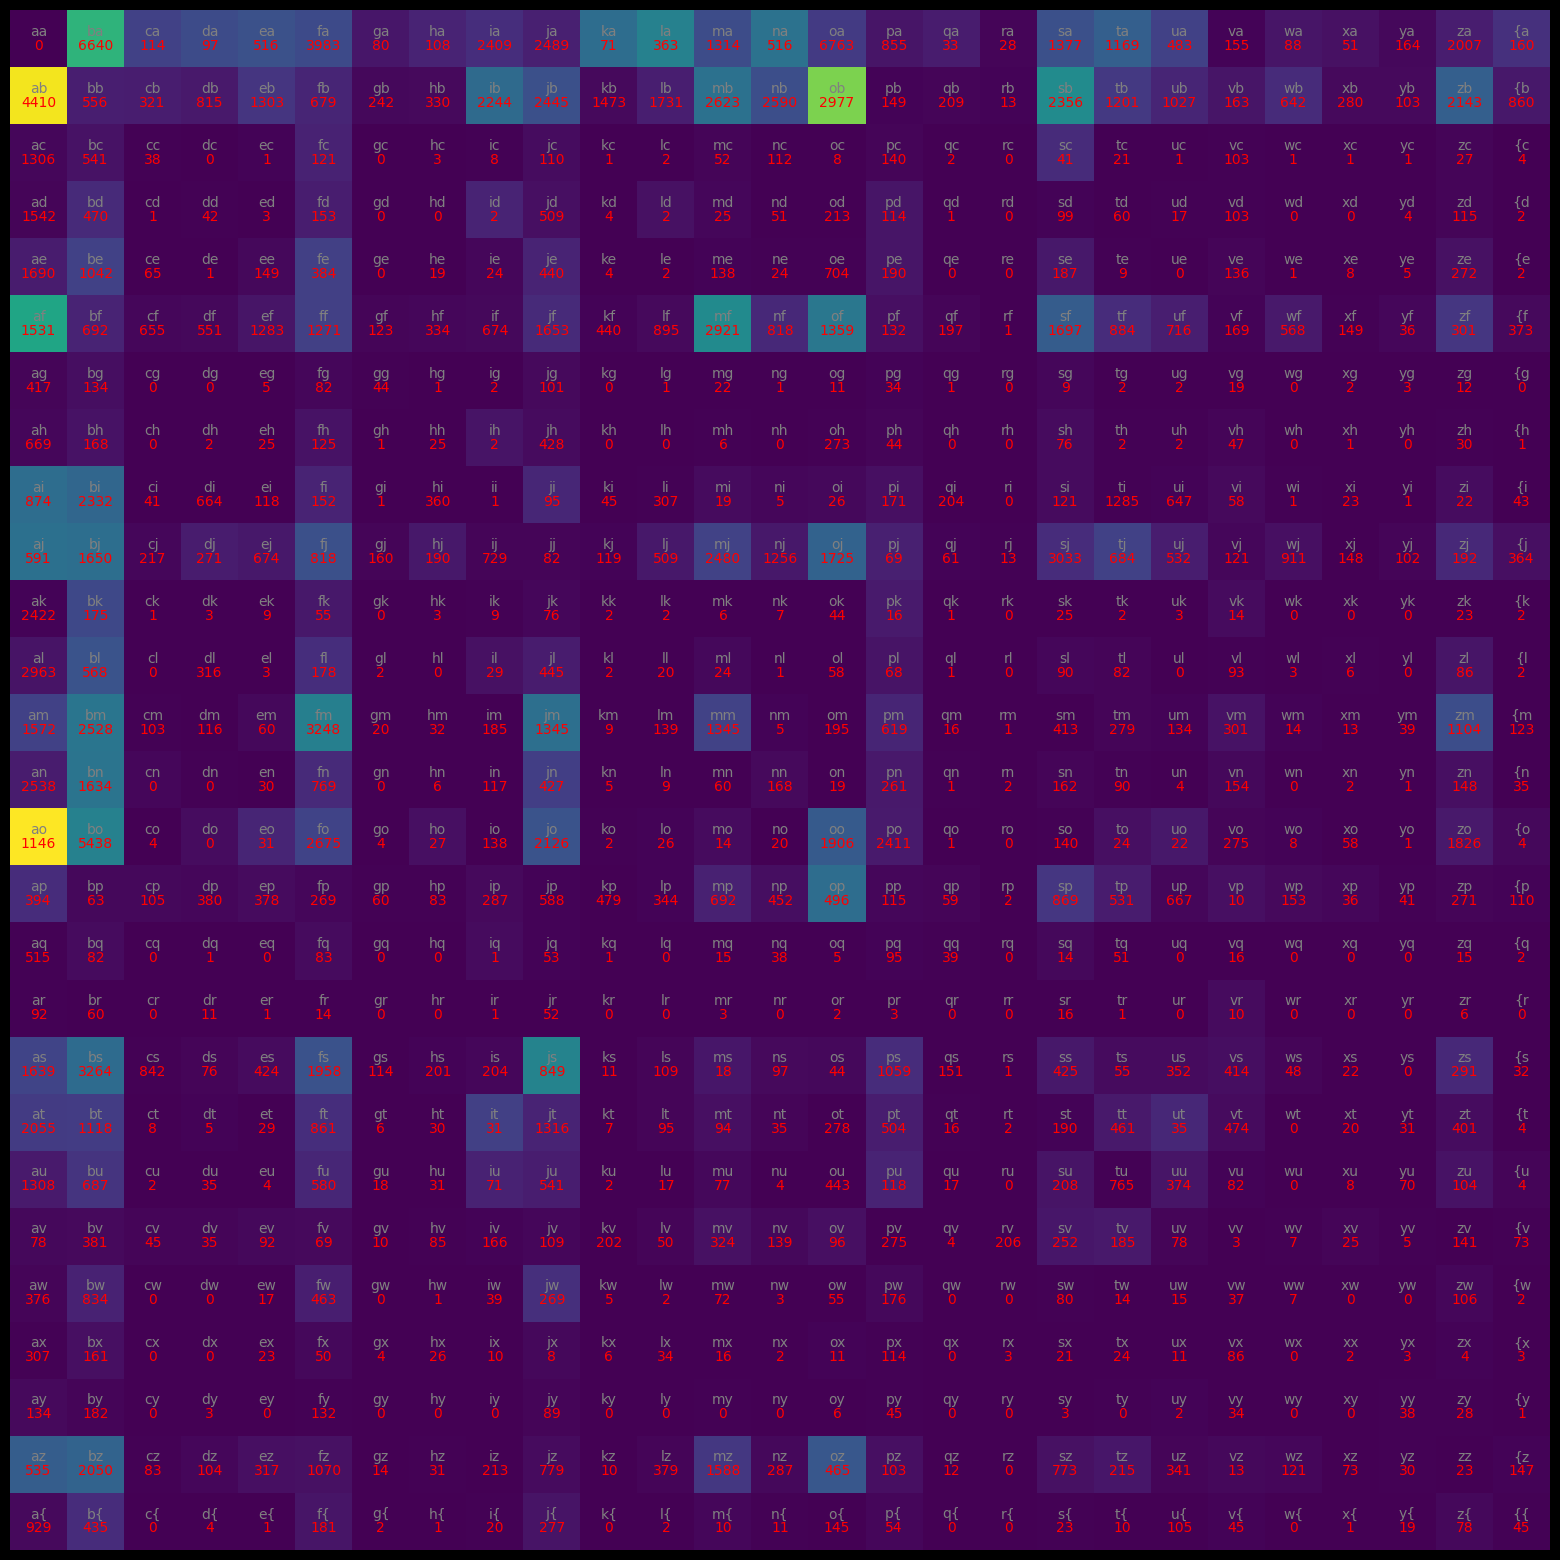

In [19]:
bigrams = torch.zeros((27 , 27) , dtype = torch.int32)
for word in words:
    chars = ['.'] + list(word) + ['.']
    for x , y  in zip(chars , chars[1:]):
        bigrams[stoi[x] , stoi[y]]+=1

plt.figure(figsize=(20 , 20))
plt.imshow(bigrams)
for i in range(27):
    for j in range(27):
        text = chr(i + 97) + chr(j + 97)
        plt.text(i , j , text , ha = 'center' , va = 'bottom' , color = 'grey')
        plt.text(i , j , bigrams[i , j].item() , ha = 'center' , va = 'top' , color = 'red')

plt.axis('off')
plt.show()

## torch generator and sampling using torch.mltinomial


In [15]:
gen = torch.Generator().manual_seed(23)
p = torch.rand(3 , generator= gen)
p = p / p.sum()
id = torch.multinomial(p , num_samples= 1 , replacement= True , generator = gen).item()
itos[id]

'b'

In [37]:
gen = torch.Generator().manual_seed(2400)
for i in range(20):
    out = []
    idx = 0
    while True:
        p = bigrams[idx]
        p = p / p.sum()
        idx = torch.multinomial(p , num_samples= 1 , replacement= True , generator = gen).item()
        out.append(itos[idx])
        if idx == 0:
            break
    print("".join(out))

janaisha.
ca.
a.
a.
rgey.
sacyan.
inelviaiay.
ta.
riativierislyr.
kkakin.
h.
myo.
eewt.
jaylisiatne.
maseryah.
a.
emmavizanevyliya.
sh.
lez.
jamad.
